In [2]:
from remode import *
import numpy as np
import matplotlib.pyplot as plt

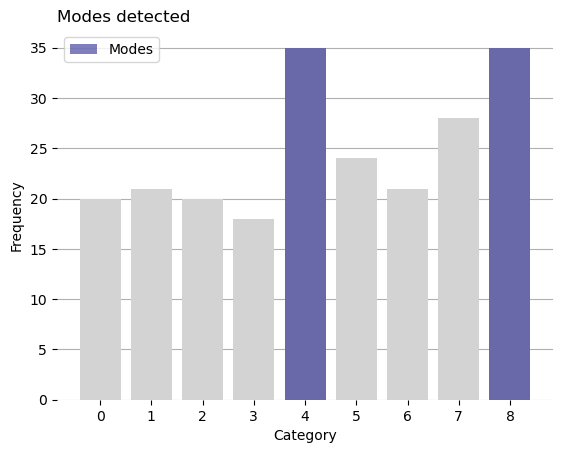

In [3]:
# Sample data (histogram counts)
xt_count = [20, 21, 20, 18, 35, 24, 21, 28, 35]

# Create an instance of ReMoDe
detector = ReMoDe()

# Fit model
results = detector.fit(xt_count)

# Plot the results
detector.plot_maxima()

## Basic example of ReMoDe

{'nr_of_modes': 1, 'modes': array([4]), 'xt': [20, 21, 20, 18, 35, 24, 21, 28, 25], 'alpha_after_correction': 0.05}


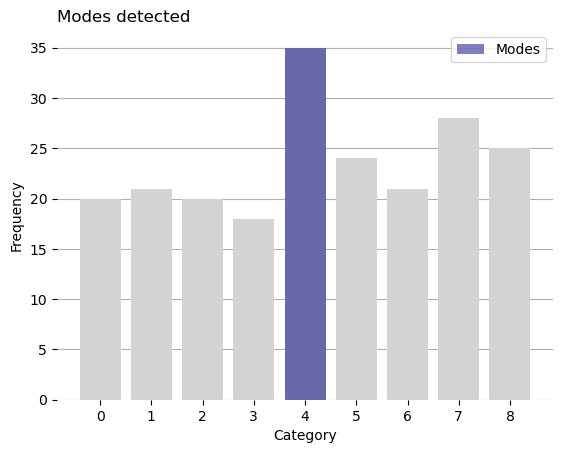

In [4]:
## Histogram counts
xt_count = [20, 21, 20, 18, 35, 24, 21, 28, 25]

# Start ReMoDe
remode = ReMoDe()

# Fit the data and plot maxima
result = remode.fit(xt_count)
print(result)

remode.plot_maxima()

89.79591836734694


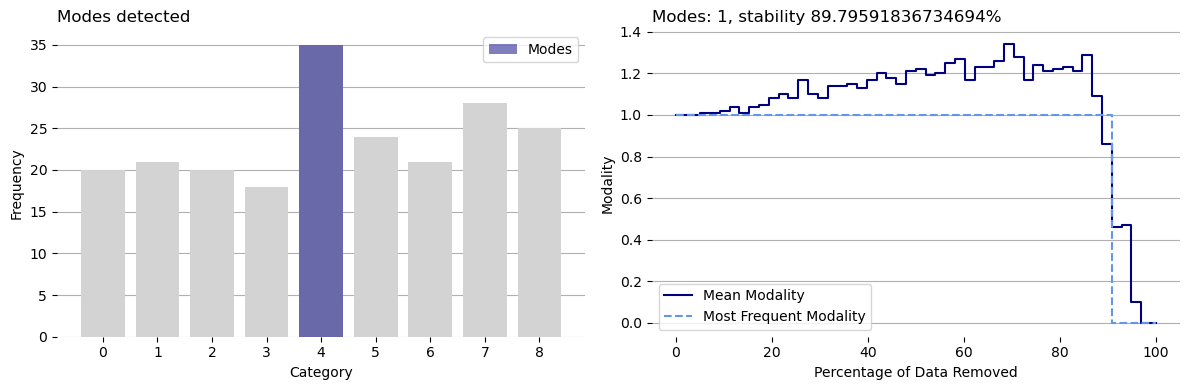

In [5]:
# Test robustness using jackknife
robustness = remode.evaluate_stability(percentage_steps=50)
print(robustness["stable_until"])

{'nr_of_modes': 1, 'modes': array([2]), 'xt': array([41, 34, 71, 36, 18]), 'alpha_after_correction': 0.05}


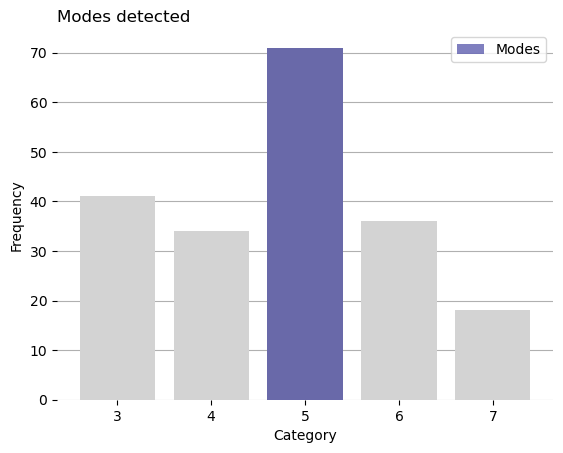

In [6]:
## Converting individual points to count data
# Generate random data
np.random.seed(0)
data = np.random.choice(range(3, 8), 200, p=[0.2, 0.2, 0.3, 0.2, 0.1])

# Start ReMoDe
remode = ReMoDe()

# Create count data
xt_count = remode.format_data(data)

# Fit the data and plot maxima
result = remode.fit(xt_count, levels=np.arange(3, 8))
print(result)

remode.plot_maxima()


## Options of  ReMoDe()




In [7]:
remode = ReMoDe(
    alpha=0.05, # alpha level desired (to be adjusted later for multiple testing)
    alpha_correction="max_modes", # or "none" (for no adjustment), or custom function
    statistical_test=perform_fisher_test, # or perform_binomial_test, or custom function
)

In [8]:

remode = ReMoDe(
    alpha=0.05, # alpha level desired (to be adjusted later for multiple testing)
    alpha_correction="max_modes", # or "none" (for no adjustment), or custom function
    statistical_test=perform_fisher_test, # or perform_binomial_test, or custom function
)


In [9]:
# Example of custom statistical test (this is actually `perform_binomial_test`)
from scipy.stats import binomtest

def custom_test(x, candidate, left_min, right_min):
    """
    Perform a custom statistical test on the candidate maximum.

    Parameters
    ----------
    x : np.ndarray
        The input data array.
    candidate : int
        The index of the candidate maximum.
    left_min : int
        The index of the minimum value on the left side of the candidate maximum.
    right_min : int
        The index of the minimum value on the right side of the candidate maximum.

    Returns
    -------
    Tuple[float, float]
        The p-values of the binomial tests for the left and right sides of the candidate maximum.
    """
    n_left = x[candidate] + x[left_min]
    n_right = x[candidate] + x[right_min]
    p_left = binomtest(x[candidate], n_left, alternative="greater").pvalue
    p_right = binomtest(x[candidate], n_right, alternative="greater").pvalue
    return p_left, p_right

# Example of custom adjustment
def custom_adjustment(len_x, alpha):
    """
    Perform a custom adjustment of p-values.

    Parameters
    ----------
    len_x : int
        The length of the input data array.
    alpha : float
        The desired alpha level.

    Returns
    -------
    float
        The adjusted alpha level
    """
    return alpha / len_x


remode = ReMoDe(
    alpha=0.05, # alpha level desired (to be adjusted later for multiple testing)
    statistical_test=perform_fisher_test, # or perform_binomial_test, or custom function
    alpha_correction=custom_adjustment,
)